# MYC Exploration

There is one highly studied oncogene located on chromsome 8. To understand the effect of the CNV event on the expression of the MYC gene we charted the difference in CNV, mRNA and proteomic values between samples with and without the event.

## Import libraries and data

In [38]:
import cptac
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Only two of our cancer types have proteomic data for the MYC gene
lscc = cptac.Lscc()
hnscc = cptac.Hnscc()

version 3scc v3.2.......                 


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 2)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 3)


In [40]:
lscc_prot = lscc.get_proteomics()
hnscc_prot = hnscc.get_proteomics()
lscc_mrna = lscc.get_transcriptomics()
hnscc_mrna = hnscc.get_transcriptomics()
lscc_cnv = lscc.get_CNV()
hnscc_cnv = hnscc.get_CNV()

In [41]:
lscc_has_event = pd.read_csv("lscc_has_event.csv")
hnscc_has_event = pd.read_csv("hnscc_has_event.csv")

## Join Databases

In [42]:
hnscc_prot_myc = hnscc_prot.join(hnscc_has_event.set_index('Patient_ID'))
hnscc_prot_myc = hnscc_prot_myc.dropna(axis=0, subset=['MYC'])

In [43]:
lscc_prot_myc = lscc_prot['MYC']
lscc_prot_myc = lscc_prot_myc.join(lscc_has_event.set_index('Patient_ID'))

In [44]:
lscc_trans_myc = lscc_mrna['MYC'].to_frame()
lscc_trans_myc = lscc_trans_myc.join(lscc_has_event.set_index('Patient_ID'))

In [45]:
hnscc_trans_myc = hnscc_mrna.join(hnscc_has_event.set_index('Patient_ID'))
hnscc_trans_myc = hnscc_trans_myc.dropna(axis=0, subset=['MYC'])

In [46]:
lscc_cnv_myc = lscc_cnv['MYC'].to_frame()
lscc_cnv_myc = lscc_cnv_myc.join(lscc_has_event.set_index('Patient_ID'))

In [47]:
hnscc_cnv_myc = hnscc_cnv.join(hnscc_has_event.set_index('Patient_ID'))
hnscc_cnv_myc = hnscc_cnv_myc.dropna(axis=0, subset=['MYC'])

## Show Boxplots (LSCC)

C:\Users\chels\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\chels\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0.5, 1.0, 'LSCC Proteomics')

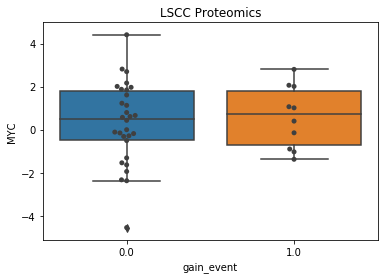

In [48]:
sns.boxplot(x='gain_event', y='NP_002458.2|NP_001341799.1', data=lscc_prot_myc)
sns.swarmplot(x='gain_event', y='NP_002458.2|NP_001341799.1', data=lscc_prot_myc, color="0.25")
plt.ylabel("MYC")
plt.title("LSCC Proteomics")

Text(0.5, 1.0, 'LSCC Transcriptomics')

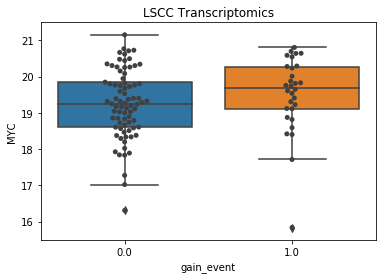

In [49]:
sns.boxplot(x='gain_event', y='MYC', data=lscc_trans_myc)
sns.swarmplot(x="gain_event", y="MYC", data=lscc_trans_myc, color="0.25")
plt.title("LSCC Transcriptomics")

Text(0.5, 1.0, 'LSCC Copy Number')

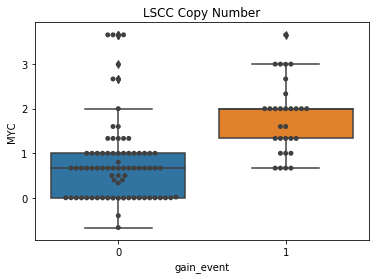

In [50]:
sns.boxplot(x='gain_event', y='MYC', data=lscc_cnv_myc)
sns.swarmplot(x='gain_event', y='MYC', data=lscc_cnv_myc, color="0.25")
plt.title("LSCC Copy Number")

## Show Boxplots (HNSCC)

Text(0.5, 1.0, 'HNSCC Proteomics')

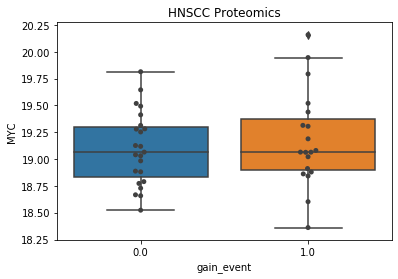

In [51]:
sns.boxplot(x='gain_event', y='MYC', data=hnscc_prot_myc)
sns.swarmplot(x="gain_event", y="MYC", data=hnscc_prot_myc, color="0.25")
plt.title("HNSCC Proteomics")

Text(0.5, 1.0, 'HNSCC Transcriptomics')

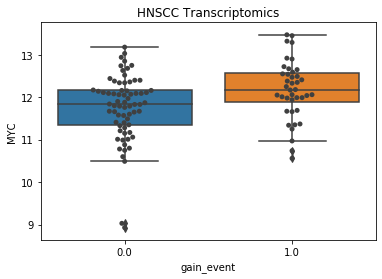

In [52]:
sns.boxplot(x='gain_event', y='MYC', data=hnscc_trans_myc)
sns.swarmplot(x="gain_event", y="MYC", data=hnscc_trans_myc, color="0.25")
plt.title("HNSCC Transcriptomics")

Text(0.5, 1.0, 'HNSCC Copy Number')

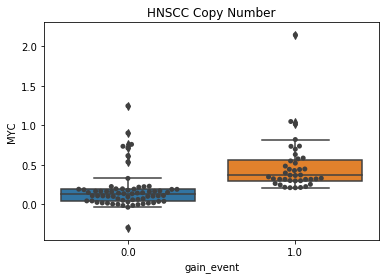

In [53]:
sns.boxplot(x='gain_event', y='MYC', data=hnscc_cnv_myc)
sns.swarmplot(x='gain_event', y='MYC', data=hnscc_cnv_myc, color="0.25")
plt.title("HNSCC Copy Number")

## Conclusion

I found it very strange that there was not a noticable difference in the proteomic data when an individual had the event vs. not having the event (which is why I plotted the transcriptomic and cnv data as well). I am not quite sure why we are seeing this pattern. 